In [1]:
import fitz
import io
from PIL import Image
import re
import matplotlib.pyplot as plt
import cv2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
zoom = 2
mat = fitz.Matrix(zoom, zoom)

In [4]:
file = 'data/tai_4_7.pdf'
doc = fitz.open(file)  
page = doc[0]  

In [5]:
data = page.get_text("dict")
data.keys()

dict_keys(['width', 'height', 'blocks'])

In [6]:
total_pixmap = page.get_pixmap(matrix = mat)
total_pixmap.save("Image/totalpixmap.png")

In [13]:
#page.get_text("dict")

In [7]:
datatotal = page.get_text("dict")["blocks"]

In [8]:
regex_question = "^Question [0-9][:]"
regex_keys_group = "[mM]uark the letter A, B, C"
regex_keys_A = "A."
regex_keys_B = "B."
regex_keys_C = "C."
regex_keys_D = "D."
def checktext(text):
    """
    Check cau truc data:
    arg:
        - "string": text.
    return:
        - 0 : don't have text.
        - 1 : Question data.
        - 2 : Key group.
        - A : Answer A.
        - B : Answer B.
        - C : Answer C.
        - D : Answer D.
    """
    ls_data = ["1","2","A", "B","C","D"]
    ls_note = [regex_question, regex_keys_group, regex_keys_A, regex_keys_B, regex_keys_C, regex_keys_D]
    for i in range(len(ls_note)):
        if re.match(ls_note[i], text):
            return ls_data[i]
    return "0"

```python
dictionranys = {
        "startbbox":(),
        "Question": [{"bbox":()}],
        "Answer":[{"bboxA":(),
                   "bboxpA":(),
                   "bboxB":(),
                   "bboxpB":(),
                   "bboxC":(),
                   "bboxpC":(), 
                   "bboxD":(),
                   "bboxpD":(),
                   "bboxtotal":()
                  }],
        "types":0,
        "endbbox":()

}
```

In [9]:
N = len(datatotal)
print(N)
dicttam ={}
dictotal = {}
dictA = {}
dem = 0
df_Q, df_A, df_B, df_C, df_D = 0, 0, 0, 0, 0
for i in range(N):
    try:
        dataspans = (datatotal[i])["lines"]
        for j in range(len(dataspans)):
            datasizes = (dataspans[j])["spans"]
            for k in range(len(datasizes)):
                datacontent = (datasizes[k])["text"]
                if re.match('^Question [0-9][0-9[:]', datacontent):
                    if df_Q == 1:
                        dictA.update({"types":1})
                        dictA.update({"Answer":[0],"endbbox":(dataspans[j])["bbox"] })
                        dictotal.update({"headling{}".format(dem):[dictA]})
                        dictA = {}
                        dicttam ={}
                    dictA.update({"startbbox":(dataspans[j])["bbox"]})
                    dictA.update({"Question":[{"text":datacontent,"bbox":(datasizes[k])["bbox"]}]})
                    dem += 1
                    df_Q, df_A, df_B, df_C, df_D = 1, 0, 0, 0, 0
                elif re.match('^A[.]', datacontent):
                    dicttam.update({"bboxpA":(dataspans[j])["bbox"],  "bboxA":(datasizes[k])["bbox"], "textA":datacontent})
                    df_A = 1
                elif re.match('^B[.]', datacontent):
                    dicttam.update({"bboxpB":(dataspans[j])["bbox"],  "bboxB":(datasizes[k])["bbox"], "textB":datacontent})
                    df_B = 1
                elif re.match('^C[.]', datacontent):
                    dicttam.update({"bboxpC":(dataspans[j])["bbox"],  "bboxC":(datasizes[k])["bbox"], "textC":datacontent})
                    df_C = 1
                elif re.match('^D[.]', datacontent):
                    dicttam.update({"bboxpD":(dataspans[j])["bbox"],  "bboxD":(datasizes[k])["bbox"], "textD":datacontent})
                    df_D, df_Q= 1, 0
                    dictA.update({"types":0})
                    dictA.update({"Answer":[dicttam],"endbbox":(dataspans[j])["bbox"] })
                    dictotal.update({"headling{}".format(dem):[dictA]})
                    dictA = {}
                    dicttam ={}
                else:
                    pass   
    except Exception as e:
        print(e) 

27


```python
"""
0:page
1:headding
2:
- Q: question
- QT: question text
- A: Anwerer A.
- AT: Anwerer text A.
- B: Anwerer B.
- BT: Anwerer text B.
- C: Anwerer C.
- CT: Anwerer text C.
- D: Anwerer D.
- DT: Anwerer text D.
"""
"image_{0}_{1}_{2}.png".format()
```

```python
position = dictotal["headling4"]
x_a = position[0]["startbbox"]
x_b = position[0]["endbbox"]
x_Q = position[0]["Question"][0]["bbox"]
x_A = position[0]["Answer"][0]["bboxpA"]
x_B = position[0]["Answer"][0]["bboxpB"]
x_C = position[0]["Answer"][0]["bboxpC"]
x_D = position[0]["Answer"][0]["bboxpD"]
```

In [10]:
for i in range(15):
    position = dictotal["headling{}".format(i+1)]
    if position[0]["types"] == 0:
        x_a = position[0]["startbbox"]
        x_b = position[0]["endbbox"]
        x_Q = position[0]["Question"][0]["bbox"]
        dataQuestion = page.get_pixmap(matrix = mat,clip=(x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        page.add_redact_annot(quad = (x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        dataQuestion.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "Q"))
        x_A = position[0]["Answer"][0]["bboxpA"]
        dataA = page.get_pixmap(matrix = mat,clip=(x_A[0], x_A[1], x_A[2], x_A[3]))
        page.add_redact_annot(quad = (x_A[0], x_A[1], x_A[2], x_A[3]))
        dataA.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "AT"))
        x_B = position[0]["Answer"][0]["bboxpB"]
        dataB = page.get_pixmap(matrix = mat,clip=(x_B[0], x_B[1], x_B[2], x_B[3]))
        page.add_redact_annot(quad = (x_B[0], x_B[1], x_B[2], x_B[3]))
        dataB.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "BT"))
        x_C = position[0]["Answer"][0]["bboxpC"]
        dataC = page.get_pixmap(matrix = mat,clip=(x_C[0], x_C[1], x_C[2], x_C[3]))
        page.add_redact_annot(quad = (x_C[0], x_C[1], x_C[2], x_C[3]))
        dataC.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "CT"))
        x_D = position[0]["Answer"][0]["bboxpD"]
        dataD = page.get_pixmap(matrix = mat,clip=(x_D[0], x_D[1], x_D[2], x_D[3]))
        page.add_redact_annot(quad = (x_D[0], x_D[1], x_D[2], x_D[3]))
        dataD.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "DT"))
        page.apply_redactions()
        datapixmap = page.get_pixmap(matrix = mat,clip=(x_a[0], x_a[1], 600, x_b[3]))
        datapixmap.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "QT"))
    else:
        x_a = position[0]["startbbox"]
        x_b = position[0]["endbbox"]
        x_Q = position[0]["Question"][0]["bbox"]
        dataQuestion = page.get_pixmap(matrix = mat,clip=(x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        page.add_redact_annot(quad = (x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        dataQuestion.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "Q"))
        page.apply_redactions()
        datapixmap = page.get_pixmap(matrix = mat,clip=(x_a[0], x_a[1], 600, x_b[1]))
        datapixmap.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "QT"))

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

KeyError: 'headling15'

In [11]:
for i in range(12):
    position = dictotal["headling{}".format(i+1)]
    if position[0]["types"] == 0:
        x_a = position[0]["startbbox"]
        x_b = position[0]["endbbox"]
        x_Q = position[0]["Question"][0]["bbox"]
        dataQuestion = page.get_pixmap(matrix = mat,clip=(x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        page.add_redact_annot(quad = (x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        dataQuestion.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "Q"))
        x_A = position[0]["Answer"][0]["bboxpA"]
        dataA = page.get_pixmap(matrix = mat,clip=(x_A[0], x_A[1], x_A[2], x_A[3]))
        page.add_redact_annot(quad = (x_A[0], x_A[1], x_A[2], x_A[3]))
        dataA.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "AT"))
        x_B = position[0]["Answer"][0]["bboxpB"]
        dataB = page.get_pixmap(matrix = mat,clip=(x_B[0], x_B[1], x_B[2], x_B[3]))
        page.add_redact_annot(quad = (x_B[0], x_B[1], x_B[2], x_B[3]))
        dataB.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "BT"))
        x_C = position[0]["Answer"][0]["bboxpC"]
        dataC = page.get_pixmap(matrix = mat,clip=(x_C[0], x_C[1], x_C[2], x_C[3]))
        page.add_redact_annot(quad = (x_C[0], x_C[1], x_C[2], x_C[3]))
        dataC.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "CT"))
        x_D = position[0]["Answer"][0]["bboxpD"]
        dataD = page.get_pixmap(matrix = mat,clip=(x_D[0], x_D[1], x_D[2], x_D[3]))
        page.add_redact_annot(quad = (x_D[0], x_D[1], x_D[2], x_D[3]))
        dataD.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "DT"))
        page.apply_redactions()
        datapixmap = page.get_pixmap(matrix = mat,clip=(x_a[0], x_a[1], 600, x_b[3]))
        datapixmap.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "QT"))
    else:
        x_a = position[0]["startbbox"]
        x_b = position[0]["endbbox"]
        x_Q = position[0]["Question"][0]["bbox"]
        dataQuestion = page.get_pixmap(matrix = mat,clip=(x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        page.add_redact_annot(quad = (x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
        dataQuestion.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "Q"))
        page.apply_redactions()
        datapixmap = page.get_pixmap(matrix = mat,clip=(x_a[0], x_a[1], 600, x_b[1]))
        datapixmap.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "QT"))

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

'Redact' annotation on page 0 of data/tai_4_3.pdf

True

In [11]:
for i in range(1):
    print(i)
    position = dictotal["headling{}".format(i+1)]
    x_a = position[0]["startbbox"]
    x_b = position[0]["endbbox"]
    datapixmap = page.get_pixmap(matrix = mat,clip=(x_a[0], x_a[1], 600, x_b[3]))
    datapixmap.save("Image/data_Q1.png")
    x_Q = position[0]["Question"][0]["bbox"]
    dataQuestion = page.get_pixmap(matrix = mat,clip=(x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
    page.add_redact_annot(quad = (x_Q[0], x_Q[1], x_Q[2], x_Q[3]))
    dataQuestion.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "Q"))
    x_A = position[0]["Answer"][0]["bboxpA"]
    dataA = page.get_pixmap(matrix = mat,clip=(x_A[0], x_A[1], x_A[2], x_A[3]))
    page.add_redact_annot(quad = (x_A[0], x_A[1], x_A[2], x_A[3]))
    dataA.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "AT"))
    x_B = position[0]["Answer"][0]["bboxpB"]
    dataB = page.get_pixmap(matrix = mat,clip=(x_B[0], x_B[1], x_B[2], x_B[3]))
    page.add_redact_annot(quad = (x_B[0], x_B[1], x_B[2], x_B[3]))
    dataB.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "BT"))
    x_C = position[0]["Answer"][0]["bboxpC"]
    dataC = page.get_pixmap(matrix = mat,clip=(x_C[0], x_C[1], x_C[2], x_C[3]))
    page.add_redact_annot(quad = (x_C[0], x_C[1], x_C[2], x_C[3]))
    dataC.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "CT"))
    x_D = position[0]["Answer"][0]["bboxpD"]
    dataD = page.get_pixmap(matrix = mat,clip=(x_D[0], x_D[1], x_D[2], x_D[3]))
    page.add_redact_annot(quad = (x_D[0], x_D[1], x_D[2], x_D[3]))
    dataD.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "DT"))
    page.apply_redactions()
    datapixmap = page.get_pixmap(matrix = mat,clip=(x_a[0], x_a[1], 600, x_b[3]))
    datapixmap.save("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "QT"))

0


'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

'Redact' annotation on page 0 of data/tai_4_7.pdf

True

<Figure size 1080x1800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_1_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_2_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_3_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_4_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_5_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_6_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_7_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_8_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_9_QT.png')

<AxesSubplot:>

Text(0.5, 1.0, 'Image_1_10_QT.png')

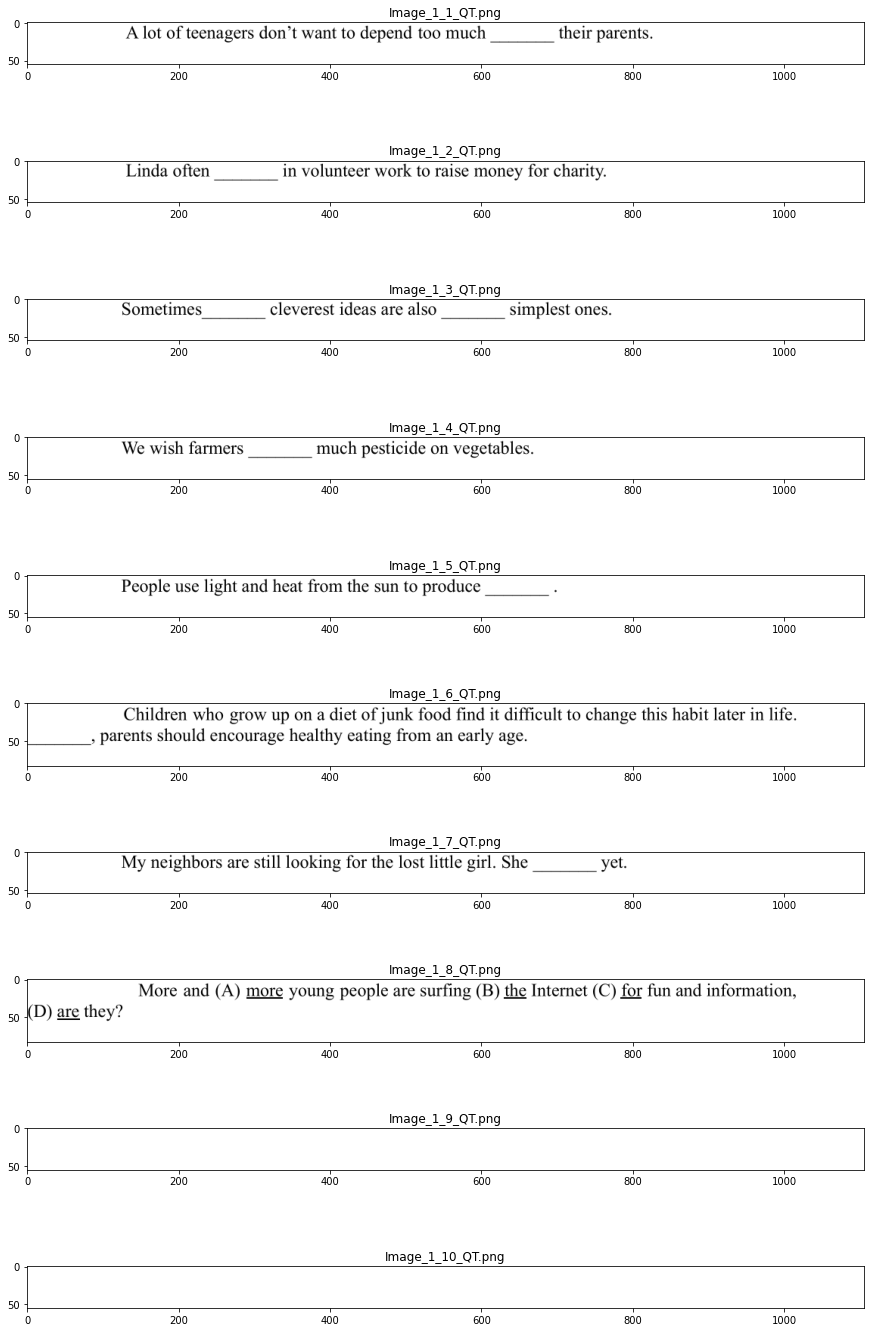

In [27]:
plt.figure(figsize=(15, 25))
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.imshow(cv2.imread("Image/Image_{0}_{1}_{2}.png".format(1, i+1, "QT"), 1))
    plt.title("Image_{0}_{1}_{2}.png".format(1, i+1, "QT"))
plt.show() 